In [1]:
from single_preprocessing_function import single_preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

In [2]:
#import pre processed data using our previous built function
X, y, ticker = single_preprocessing()

#We can confirm which ticker is configured by default by our function
print(ticker)

SPLK


In [3]:
X.shape

(2956, 4)

In [4]:
y.shape

(2956,)

## Before designing the RNN first let's split our data into a train/test split

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [6]:
X.shape

(2956, 4)

### Making a baseline

In [7]:
#Build a baseline ANN densely connected so that we can compare how LSTM y is better

In [9]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Dense(8, activation='relu', input_dim=X.shape[-1] ))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae', metrics=['acc'])
history = model.fit(X_train, y_train, steps_per_epoch=150, epochs=20, validation_data=(X_val, y_val))



Epoch 1/20


150/150 [==============================] - 2s 5ms/step - loss: 92.6186 - acc: 0.0000e+00 - val_loss: 89.5771 - val_acc: 0.0000e+00
Epoch 2/20
150/150 [==============================] - 0s 3ms/step - loss: 92.1720 - acc: 0.0000e+00 - val_loss: 87.6219 - val_acc: 0.0000e+00
Epoch 3/20
150/150 [==============================] - 0s 3ms/step - loss: 88.1790 - acc: 0.0000e+00 - val_loss: 84.1382 - val_acc: 0.0000e+00
Epoch 4/20
150/150 [==============================] - 0s 2ms/step - loss: 84.3777 - acc: 0.0000e+00 - val_loss: 78.7920 - val_acc: 0.0000e+00
Epoch 5/20
150/150 [==============================] - 0s 2ms/step - loss: 77.5976 - acc: 0.0000e+00 - val_loss: 71.3351 - val_acc: 0.0000e+00
Epoch 6/20
150/150 [==============================] - 0s 2ms/step - loss: 69.2118 - acc: 0.0000e+00 - val_loss: 61.3941 - val_acc: 0.0000e+00
Epoch 7/20
150/150 [==============================] - 0s 2ms/step - loss: 57.2941 - acc: 0.0000e+00 - val_loss: 48.7420 - val_acc: 0.0000e+00
Ep

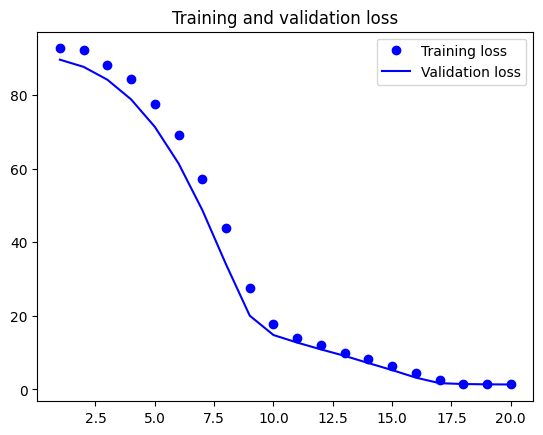

In [10]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [12]:
predicted_stock_price = model.predict(X_test)

19/19 [==============================] - 0s 3ms/step


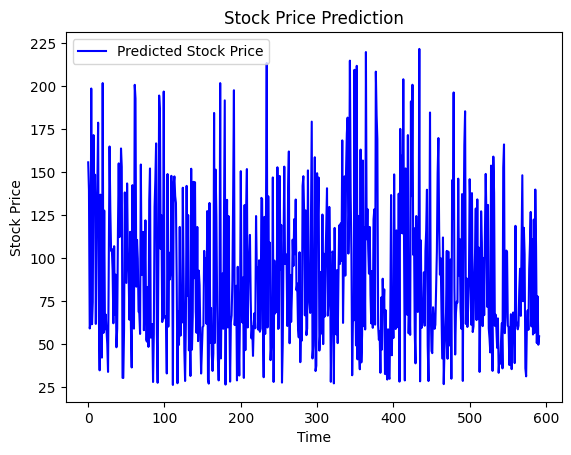

In [13]:
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

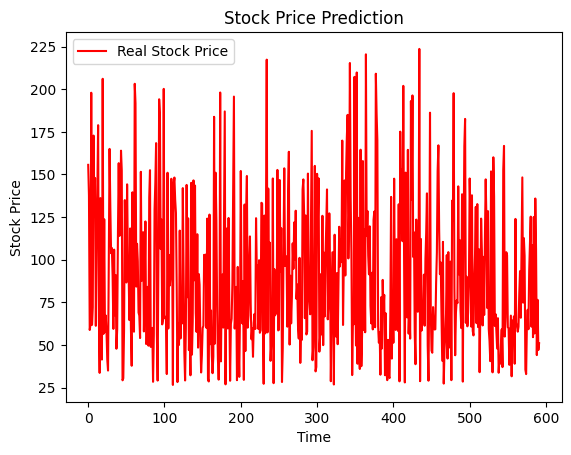

In [14]:
plt.plot(y_test, color='red', label='Real Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

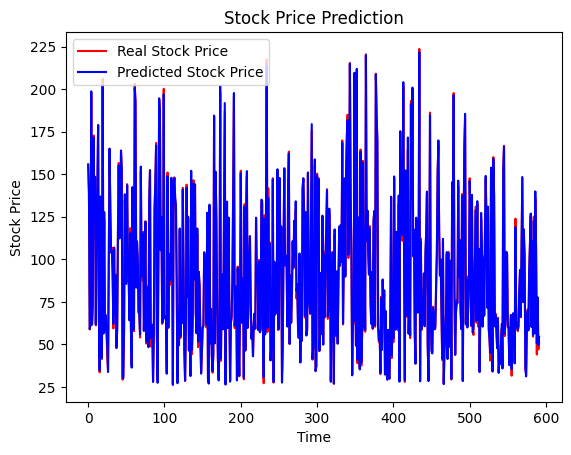

In [15]:
plt.plot(y_test, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [16]:
#Evaluate regression model using mse
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predicted_stock_price)

5.042136623864004

In [17]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, predicted_stock_price)

0.017246737509113173

In [ ]:
#So we can see that a normal ANN is acceptably good at predicting stock values with an MSE of 5 and a mpe of 1% but there are a couple of issues with this
#first with this ANN we are predicting the same day stock value already knowing the high and low price of the day so the model is basically cheating
#Most importantly we are interested on predicting the future day or week or month stock close value with previous day or week or month features
# for this we will implement an LSTM

In [ ]:
# first let's define some parameters
lookback = 60 #The model will look back 
steps = 1 #Observations will be sampled at one data point per day 
delay = 1 #Targets will be 1 day in the Future

In [18]:
from numpy import array
data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
data = data.reshape((1, 10, 1))
print(data.shape)

(1, 10, 1)


In [19]:
data

array([[[0.1],
        [0.2],
        [0.3],
        [0.4],
        [0.5],
        [0.6],
        [0.7],
        [0.8],
        [0.9],
        [1. ]]])

In [24]:
data[0][0]

array([0.1])